# Part 4 - Simple Linear Regression

Finally!
Let's get started with a basic Machine Learning algorithm: **Simple Linear Regression**.  
Think of this as the `"Hello World!"` of ML!  
Everyone remembers the equation of a line:  
  
$$
y = mx + b
$$ 
  
Given an unknown value of `x`, we can infer `y` by multiplying by slope `m` and adding y-intercept `b`.  
Linear Regression uses the same basic concept, however `x` can be multidimensional, denoted as a matrix `X`.  
This notebook will deal with only single dimensional `x`.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

## Let's load the data and remind ourselves of the contents

In [2]:
df = pd.read_csv('./data/sf/data_clean_engineered.csv')
df.head()

,bath,bed,sqft,price,property_type_apartment,property_type_auction,property_type_coming,property_type_condo,property_type_coop,property_type_house,...,postal_code_94121,postal_code_94122,postal_code_94123,postal_code_94124,postal_code_94127,postal_code_94131,postal_code_94132,postal_code_94133,postal_code_94134,postal_code_94501
0,2.0,3.0,1520.0,1995000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,566.0,625000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,914.0,1196000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.5,1.0,1022.0,935000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1912.0,2750000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


For this basic linear regression example we will choose only one variable as our independent variable `x`.  
In our EDA we discovered that `sqft` was highly correlated with `price` and they also shared a linear relationship.  
This makes `sqft` a great candidate for inferring `price` using linear regression.  

Recall our line equation: 
$$
y = mx + b
$$ 

We assign the 'price' column of our DataFrame as the dependent variable `y` and the 'sqft' column as the independent variable `x`

In [3]:
x = df['sqft']
y = df['price']

Note:  
Indexing into a single column of a `pandas.DataFrame` will return a `pandas.Series` object while indexing multiple columns will return another `pandas.DataFrame`. Additionally, the `pandas.Series` object is a wrapper around the popular `numpy.ndarray` datatype. We can get the `numpy.ndarray` from the `Series` using `Series.values`.  
See below:

In [4]:
print("df type = {}".format(type(df)))
print("x type = {}".format(type(x)))
print("y type = {}".format(type(y)))
multi_indexed = df[['sqft', 'price']]
print("multi_indexed type = {}".format(type(multi_indexed)))
ndarray = x.values
print("x.values type = {}".format(type(ndarray)))

df type = <class 'pandas.core.frame.DataFrame'>
x type = <class 'pandas.core.series.Series'>
y type = <class 'pandas.core.series.Series'>
multi_indexed type = <class 'pandas.core.frame.DataFrame'>
x.values type = <class 'numpy.ndarray'>


## Plot `price` vs `sqft`

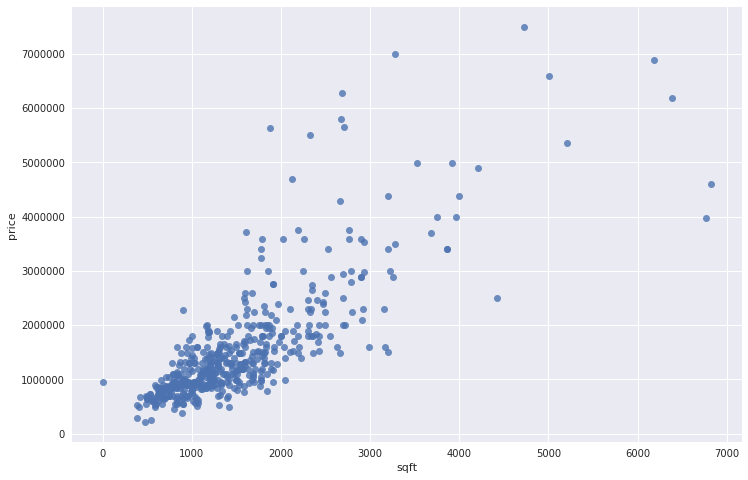

In [5]:
sns.set(rc={'figure.figsize':(12, 8)})# globally set our seaborn plot size to 12 by 8 inches
sns.regplot(x, y, fit_reg=False)

We observe a linear relationship between `x` and `y` and we could probably visually estimate a best fitting line using our eyes however let's determine this best fitting line algorithmically using [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares).  

Ordinary Least Squares (OLS) is a great introduction to our first **Optimization** problem in which we are **minimizing** the sum of square differences between the observed and predicted values in order to find the best fit line to the data.  
  
Basically: 
1. start with an initial *guess* at the slope `m` and y-intercept `b` of the line equation
2. calculate the sum of square differences between the predicted value of `y` and the actual value of `y`.
3. adjust parameters (slope `m` and y-intercept `b`) such that error gets *smaller*.
4. repeate steps 1-3 until error cannot decrease any further.
  

### See [here] for a quick, interactive tutorial on OLS.
[here]: http://setosa.io/ev/ordinary-least-squares-regression/

Rather than write our linear regressor from scratch, let's use the [LinearRegression] module from [scikit-learn], a popular machine learning library.  
[LinearRegression]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
[Scikit-Learn]: http://scikit-learn.org/stable/

In [7]:
regressor = LinearRegression(normalize=True)

We can now simply call `fit()` on the `regressor` object to run OLS to iteratively fit to the training data.  
  
Note:  
`fit()` expects `x` to be a `numpy.ndarray` of shape `(num_samples, num_features)` and `y` to be of shape `(num_samples, 1)`.  
Recall we are only dealing with single variable linear regression in this notebook so our number of features is 1 however in multiple linear regression the number of features can be very large. 

Let's try first with our `x` and `y` DataFrames so we can get acquianted with the error message in case we encounter something similar in the future

In [8]:
print("x.shape = {}".format(x.shape))
print("y.shape = {}".format(y.shape))
model = regressor.fit(x,y)

x.shape = (514,)
y.shape = (514,)


ValueError: Expected 2D array, got 1D array instead:
array=[1.520e+03 5.660e+02 9.140e+02 1.022e+03 1.912e+03 6.300e+02 1.479e+03
 1.166e+03 1.160e+03 1.336e+03 7.350e+02 2.308e+03 1.839e+03 1.510e+03
 1.026e+03 1.215e+03 1.779e+03 1.200e+03 8.620e+02 9.420e+02 1.471e+03
 1.421e+03 1.128e+03 1.918e+03 3.200e+03 1.300e+03 9.970e+02 1.308e+03
 3.200e+03 1.093e+03 7.440e+02 1.170e+03 1.050e+03 1.282e+03 1.656e+03
 8.340e+02 1.049e+03 1.525e+03 1.500e+03 1.430e+03 1.496e+03 1.523e+03
 2.475e+03 8.900e+02 2.700e+03 1.315e+03 1.475e+03 1.805e+03 1.695e+03
 1.852e+03 8.060e+02 4.418e+03 2.137e+03 3.157e+03 2.500e+03 1.810e+03
 1.788e+03 3.221e+03 2.628e+03 2.720e+03 1.299e+03 6.240e+02 2.050e+03
 5.203e+03 6.900e+02 1.099e+03 2.300e+03 1.308e+03 6.260e+02 1.132e+03
 7.420e+02 1.838e+03 1.009e+03 1.284e+03 1.170e+03 1.820e+03 1.270e+03
 2.330e+03 1.980e+03 2.050e+03 2.478e+03 6.762e+03 1.686e+03 1.439e+03
 1.785e+03 1.024e+03 9.290e+02 6.383e+03 5.000e+02 8.450e+02 1.021e+03
 1.886e+03 9.370e+02 2.000e+03 7.640e+02 8.300e+02 6.640e+02 1.213e+03
 8.670e+02 6.290e+02 6.650e+02 7.950e+02 5.000e+02 4.190e+02 1.004e+03
 8.440e+02 1.175e+03 1.373e+03 9.320e+02 1.900e+03 2.898e+03 1.117e+03
 6.825e+03 3.865e+03 6.800e+02 9.650e+02 1.823e+03 9.440e+02 4.730e+03
 9.000e+02 2.345e+03 4.210e+03 5.003e+03 9.680e+02 1.650e+03 1.680e+03
 1.400e+03 1.250e+03 2.917e+03 2.433e+03 8.000e+02 2.550e+03 1.400e+03
 6.780e+02 4.890e+02 4.850e+02 5.940e+02 3.850e+02 6.250e+02 8.810e+02
 2.320e+03 1.330e+03 1.600e+03 1.838e+03 8.000e+02 1.025e+03 1.245e+03
 2.416e+03 9.000e+02 9.010e+02 1.075e+03 1.319e+03 2.560e+03 1.442e+03
 1.926e+03 2.914e+03 1.430e+03 8.920e+02 5.680e+02 3.915e+03 2.100e+03
 1.900e+03 9.250e+02 2.800e+03 1.870e+03 2.988e+03 2.490e+03 2.400e+03
 1.970e+03 2.342e+03 1.299e+03 6.000e+02 1.593e+03 3.282e+03 2.260e+03
 2.790e+03 2.337e+03 3.687e+03 2.765e+03 1.115e+03 6.187e+03 1.870e+03
 1.790e+03 1.600e+03 1.510e+03 8.400e+02 1.793e+03 6.750e+02 1.300e+03
 1.360e+03 9.260e+02 1.003e+03 3.525e+03 1.211e+03 1.812e+03 1.185e+03
 1.767e+03 1.250e+03 1.590e+03 1.212e+03 1.156e+03 1.342e+03 1.318e+03
 1.080e+03 1.140e+03 1.414e+03 1.156e+03 1.115e+03 6.700e+02 1.018e+03
 1.910e+03 1.419e+03 1.605e+03 1.216e+03 1.780e+03 7.950e+02 6.700e+02
 7.100e+02 1.882e+03 1.189e+03 1.203e+03 1.395e+03 9.720e+02 2.685e+03
 1.181e+03 1.161e+03 1.189e+03 2.126e+03 9.430e+02 1.000e+00 2.706e+03
 1.360e+03 4.950e+02 1.582e+03 1.058e+03 3.960e+03 2.253e+03 9.060e+02
 7.820e+02 1.184e+03 8.230e+02 3.755e+03 9.600e+02 1.100e+03 1.547e+03
 2.903e+03 1.256e+03 1.526e+03 6.180e+02 7.430e+02 8.840e+02 1.092e+03
 7.070e+02 8.690e+02 9.030e+02 8.660e+02 5.360e+02 7.690e+02 2.027e+03
 6.560e+02 7.750e+02 1.579e+03 1.755e+03 1.560e+03 1.541e+03 1.450e+03
 2.663e+03 1.688e+03 9.600e+02 1.350e+03 1.690e+03 1.780e+03 1.382e+03
 2.221e+03 2.357e+03 9.000e+02 1.790e+03 2.425e+03 8.300e+02 1.500e+03
 1.189e+03 1.250e+03 1.325e+03 7.500e+02 3.168e+03 7.460e+02 1.782e+03
 1.892e+03 9.180e+02 1.560e+03 1.181e+03 1.823e+03 1.747e+03 2.500e+03
 6.530e+02 1.947e+03 1.708e+03 1.314e+03 2.189e+03 8.250e+02 1.223e+03
 1.638e+03 1.308e+03 9.890e+02 1.500e+03 1.131e+03 1.630e+03 7.830e+02
 2.937e+03 6.730e+02 9.000e+02 1.912e+03 1.198e+03 2.929e+03 3.256e+03
 1.024e+03 1.100e+03 2.677e+03 6.480e+02 5.000e+02 6.030e+02 9.200e+02
 1.542e+03 1.826e+03 6.070e+02 8.280e+02 1.073e+03 2.898e+03 1.225e+03
 5.580e+02 5.920e+02 2.345e+03 9.000e+02 9.460e+02 8.420e+02 1.915e+03
 9.480e+02 2.133e+03 1.400e+03 1.212e+03 2.030e+03 1.250e+03 1.500e+03
 1.400e+03 2.658e+03 4.040e+02 1.100e+03 6.690e+02 1.193e+03 1.681e+03
 9.370e+02 6.600e+02 7.500e+02 1.180e+03 1.616e+03 6.720e+02 3.910e+02
 8.900e+02 1.125e+03 6.310e+02 9.000e+02 9.010e+02 3.994e+03 2.178e+03
 2.695e+03 1.422e+03 2.000e+03 5.680e+02 7.850e+02 7.850e+02 1.600e+03
 1.280e+03 1.384e+03 1.340e+03 1.868e+03 1.042e+03 2.790e+03 2.760e+03
 1.834e+03 7.000e+02 1.050e+03 1.590e+03 1.024e+03 1.155e+03 1.187e+03
 8.400e+02 8.540e+02 4.740e+02 6.500e+02 1.187e+03 7.780e+02 6.460e+02
 9.760e+02 1.204e+03 2.151e+03 1.812e+03 9.030e+02 1.145e+03 1.735e+03
 1.694e+03 1.612e+03 1.058e+03 8.750e+02 1.407e+03 8.070e+02 5.500e+02
 1.525e+03 1.007e+03 1.500e+03 1.063e+03 1.675e+03 1.850e+03 1.958e+03
 1.170e+03 8.140e+02 1.676e+03 7.380e+02 8.320e+02 5.360e+02 2.045e+03
 1.505e+03 2.433e+03 1.640e+03 1.690e+03 9.650e+02 1.423e+03 1.531e+03
 1.694e+03 1.895e+03 1.240e+03 1.580e+03 1.375e+03 1.850e+03 9.560e+02
 1.113e+03 2.200e+03 1.300e+03 1.810e+03 2.360e+03 1.290e+03 1.626e+03
 2.300e+03 1.099e+03 8.370e+02 2.528e+03 1.067e+03 1.067e+03 7.400e+02
 9.980e+02 6.500e+02 5.400e+02 1.330e+03 1.024e+03 2.196e+03 1.587e+03
 1.565e+03 9.370e+02 1.220e+03 1.692e+03 3.865e+03 1.398e+03 1.170e+03
 1.730e+03 2.100e+03 1.325e+03 2.393e+03 1.625e+03 1.200e+03 1.440e+03
 1.300e+03 2.189e+03 3.280e+03 8.370e+02 9.480e+02 5.940e+02 3.200e+03
 1.024e+03 1.251e+03 1.108e+03 1.785e+03 9.760e+02 1.199e+03 1.550e+03
 1.600e+03 2.700e+03 2.300e+03 1.000e+03 1.780e+03 1.763e+03 1.470e+03
 1.668e+03 1.450e+03 6.130e+02 8.400e+02 1.533e+03 1.032e+03 8.500e+02
 1.317e+03 1.310e+03 1.780e+03 1.583e+03 1.602e+03 2.328e+03 1.256e+03
 1.625e+03 8.500e+02 1.284e+03 1.001e+03 1.243e+03 6.700e+02 1.600e+03
 1.560e+03 1.690e+03 1.780e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

We get:  
`ValueError: Expected 2D array, got 1D array instead`  
Let's reshape our data to 2D `numpy.ndarray`

In [9]:
num_samples = len(x)
assert len(x) == len(y) # be sure we have the same number of training samples as target samples
num_features = 1 # only a single feature, sqft
x_np = x.values.reshape((num_samples, num_features))
y_np = y.values.reshape((num_samples, 1))

In [10]:
print("x_np.shape = {}".format(x_np.shape))
print("y_np.shape = {}".format(y_np.shape))
model = regressor.fit(x_np, y_np)

x_np.shape = (514, 1)
y_np.shape = (514, 1)


The regressor has been fit to our training data and saved into a variable named `model`.  
Now we can call `predict()` to predict `price` for a given `sqft`. For illustrative purposes we will predict on the same data we trained on

We can evaluate the performance of a given model using Scikit-Learn `mean_square_error` and `LinearRegression.score()` function

In [11]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X) # predict y values from input X
    mse = mean_squared_error(y_true=y, y_pred=y_pred)
    print("Mean Squared Error: {}".format(mse))
    print("Accuracy: {}%".format(model.score(X, y)*100.0))
evaluate_model(model, x_np, y_np)

Mean Squared Error: 418571590611.2379
Accuracy: 63.75250763108329%


As our model improves we expect the MSE to decrease and Accuracy to increase.

Let's try on a brand new input from https://www.zillow.com/homes/for_sale/San-Francisco-CA/

In [14]:
# try brand new data
actual_price = '$583,000'
sqft = 800
new_df = pd.DataFrame(data=[sqft])
predicted_price = model.predict(new_df)
print("predicted price: ${}M".format(predicted_price[0][0]/1e6))
print("actual price: {}".format(actual_price))

predicted price: $0.832207697355416M
actual price: $583,000


Plot the predicted values (red) and actual values (blue) on the same graph

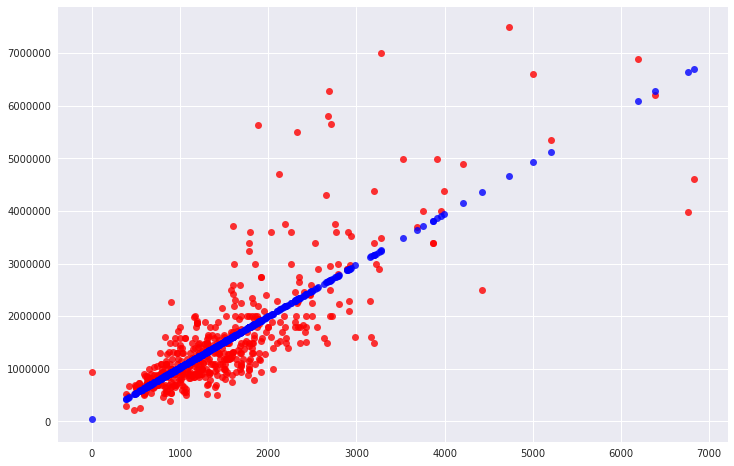

In [13]:
y_pred = model.predict(x_np) # predict y values from input X
sns.regplot(x_np, y_np, fit_reg=False, color='red')
sns.regplot(x_np, y_pred, fit_reg=False, color='blue')

Our model looks like it has fit nicely to the data!  
One immediate drawback you may notice is that the predictions are constrained to the regression line which results in a large error for many inputs.  
Even more importantly: we have many more features other than `sqft` which can help predict `price`.
We address these problems in the next notebook by introducing **multiple linear regression**.

## Model Validation
In the above example we trained and tested our model with the same dataset. In practice this is a **big** mistake. We will get false confidence in our model's performance since we didn't validate the it's ability to generalize to new, unseen data from outside of the training set.  
This inability to generalize is called [overfitting] and is one of the most frequently occuring problems in ML.  
  
New data is typically hard to come by but we can do our best to avoid overfitting by "holding out" some of our training data as *validation* data. Hopefully our dataset is diverse enough that random sampling a validation dataset can properly represent new, unseen test data.
[overfitting]: https://en.wikipedia.org/wiki/Overfitting

## TODO: Maybe we add another notebook on Cross validation schemes?

Use Scikit-Learn's `train_test_split()` to divide our dataset into *training* and *validation* data.  
A good rule of thumb is 70% training, 30% validation.

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_np, 
                                                  y_np, 
                                                  test_size=0.30, 
                                                  random_state=123) # split 70% train, 30% validation

Fit the model to our training set and evaluate using our validation set

In [16]:
model= regressor.fit(x_train, y_train)
evaluate_model(model, x_val, y_val)

Mean Squared Error: 369418188551.6969
Accuracy: 59.361117697240815%


The results are very similar to before, however don't expect to get this lucky in practice!  
Let's save our model using Python's built-in persistence library `pickle`. That way we can compare results with more complex models in a future notebook.

Since we are reasonably confident our model is not overfitting, let's retrain on the entire dataset before saving

In [17]:
model= regressor.fit(x_np, y_np)

In [18]:
import pickle
with open('./models/sf/simple_linear.pkl', 'wb') as f:
    pickle.dump(model, f)

We can reload the model with:

In [19]:
with open('./models/sf/simple_linear.pkl', 'rb') as f:
    model_load = pickle.load(f)
evaluate_model(model_load, x_val, y_val)

Mean Squared Error: 368582741690.3204
Accuracy: 59.45302336870437%


## We are done with Linear Regression. Let's see if we can improve our model accuracy by including more features!